In [ ]:
Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
np_max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
np_min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)
months

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Text(0, 0.5, 'Temperature(*)')

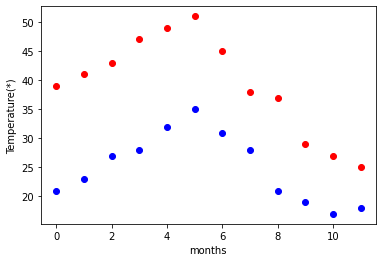

In [74]:
plt.plot(months,np_max,'ro')
plt.plot(months,np_min,'bo')
plt.xlabel('months')
plt.ylabel('Temperature(*)')

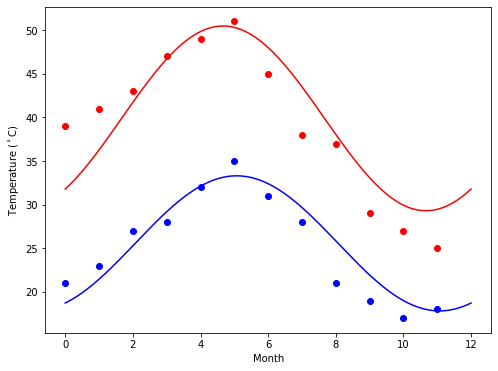

In [79]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(months, np_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, np_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [76]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, np_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, np_min, [-40, 20, 0])

In [78]:
res_max,cov_max

(array([ 39.88861734, -10.59083166,   1.33370154]),
 array([[ 1.28972692, -0.14357418, -0.02263924],
        [-0.14357418,  2.57009611, -0.03276299],
        [-0.02263924, -0.03276299,  0.07074015]]))

In [ ]:
Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [23]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [30]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [34]:
gender=titanic['sex'].astype('category')

In [ ]:
gender=gender.cat.codes

In [61]:
gender.value_counts()

 1    843
 0    466
-1      1
dtype: int64

In [55]:
titanic['sex'].unique()

array(['female', 'male', nan], dtype=object)

([<matplotlib.patches.Wedge at 0x7fd25ffb9eb0>,
 [Text(-0.47930837991371283, 0.9900825606708221, 'female'),
  Text(0.47693272451693625, -0.9912291240096067, 'male'),
  Text(1.0999968373797648, -0.0026377555829792576, 'nan')],
 [Text(-0.2614409344983888, 0.5400450330931756, '64.4%'),
  Text(0.26014512246378335, -0.5406704312779672, '35.6%'),
  Text(0.599998274934417, -0.0014387757725341404, '0.1%')])

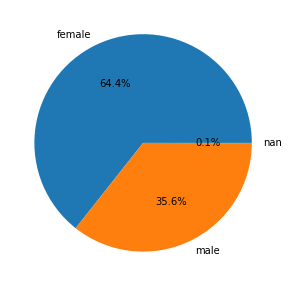

In [66]:
plt.figure(figsize=(5,5))
plt.pie(gender.value_counts(),labels=titanic['sex'].unique(),autopct='%1.1f%%')

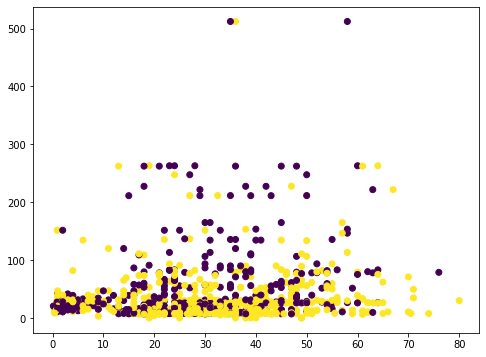

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(titanic['age'],titanic['fare'],c= gender)